In [33]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Electric_Vehicle_Population_Data.csv')


In [34]:
import sqlite3

# Create a connection to an in-memory database
conn = sqlite3.connect(':memory:')

# Load DataFrame into SQL
df.to_sql('ev_data', conn, index=False, if_exists='replace')


235692

In [35]:
print(df.head())

   VIN (1-10)    County     City State  Postal Code  Model Year     Make  \
0  5YJ3E1EBXK      King  Seattle    WA      98178.0        2019    TESLA   
1  5YJYGDEE3L    Kitsap  Poulsbo    WA      98370.0        2020    TESLA   
2  KM8KRDAF5P    Kitsap   Olalla    WA      98359.0        2023  HYUNDAI   
3  5UXTA6C0XM    Kitsap  Seabeck    WA      98380.0        2021      BMW   
4  JTMAB3FV7P  Thurston  Rainier    WA      98576.0        2023   TOYOTA   

        Model                   Electric Vehicle Type  \
0     MODEL 3          Battery Electric Vehicle (BEV)   
1     MODEL Y          Battery Electric Vehicle (BEV)   
2     IONIQ 5          Battery Electric Vehicle (BEV)   
3          X5  Plug-in Hybrid Electric Vehicle (PHEV)   
4  RAV4 PRIME  Plug-in Hybrid Electric Vehicle (PHEV)   

   Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0            Clean Alternative Fuel Vehicle Eligible           220.0   
1            Clean Alternative Fuel Vehicle Eligible    

In [36]:
print(df.isnull().sum())

VIN (1-10)                                             0
County                                                 3
City                                                   3
State                                                  0
Postal Code                                            3
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                        36
Base MSRP                                             36
Legislative District                                 494
DOL Vehicle ID                                         0
Vehicle Location                                      10
Electric Utility                                       3
2020 Census Tract                                      3
dtype: int64


In [37]:
df.columns = df.columns.str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

In [48]:
# Remove rows with NaN or zero in Electric Range
df_cleaned = df[df['Electric_Range'].notna() & (df['Electric_Range'] > 0)]

# Then load into SQL
df_cleaned.to_sql('ev_data', conn, index=False, if_exists='replace')


95895

In [38]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235692 entries, 0 to 235691
Data columns (total 17 columns):
 #   Column                                           Non-Null Count   Dtype  
---  ------                                           --------------   -----  
 0   VIN_1-10                                         235692 non-null  object 
 1   County                                           235689 non-null  object 
 2   City                                             235689 non-null  object 
 3   State                                            235692 non-null  object 
 4   Postal_Code                                      235689 non-null  float64
 5   Model_Year                                       235692 non-null  int64  
 6   Make                                             235692 non-null  object 
 7   Model                                            235692 non-null  object 
 8   Electric_Vehicle_Type                            235692 non-null  object 
 9   Clean_Alternati

In [10]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235692 entries, 0 to 235691
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         235692 non-null  object 
 1   County                                             235689 non-null  object 
 2   City                                               235689 non-null  object 
 3   State                                              235692 non-null  object 
 4   Postal Code                                        235689 non-null  float64
 5   Model Year                                         235692 non-null  int64  
 6   Make                                               235692 non-null  object 
 7   Model                                              235692 non-null  object 
 8   Electric Vehicle Type                              235692 non-null  object

In [16]:
# Most Common Makes and Models 

In [39]:
query = '''
SELECT Make, COUNT(*) AS Total 
FROM ev_data
GROUP BY Make
ORDER BY Total DESC
LIMIT 10
'''
top_makes = pd.read_sql(query,conn)
print(top_makes)

         Make   Total
0       TESLA  101080
1   CHEVROLET   17135
2      NISSAN   15532
3        FORD   12605
4         KIA   11345
5         BMW    9647
6      TOYOTA    9478
7     HYUNDAI    7406
8      RIVIAN    6750
9  VOLKSWAGEN    5976


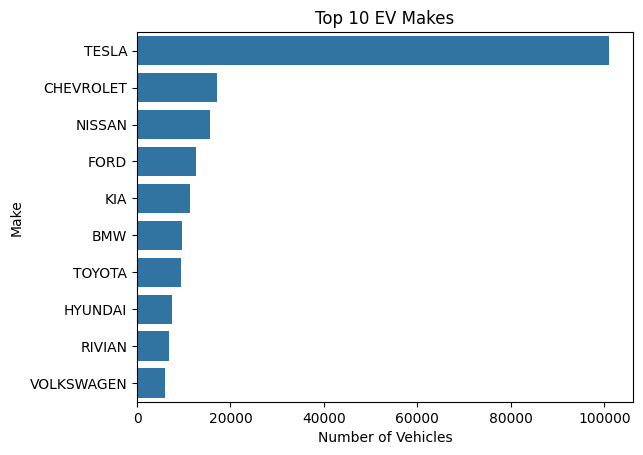

In [40]:
sns.barplot(data=top_makes, x='Total' , y='Make')
plt.title('Top 10 EV Makes')
plt.xlabel('Number of Vehicles')
plt.ylabel('Make')
plt.show()

In [19]:
# Electric Range by Vehicle Type

In [53]:
query = '''
SELECT Electric_Vehicle_Type, AVG(Electric_Range) AS Avg_Range
FROM ev_data
WHERE Electric_Range IS NOT NULL AND Electric_Range > 0
GROUP BY Electric_Vehicle_Type
'''
range_type = pd.read_sql(query, conn)
print(range_type)


                    Electric_Vehicle_Type   Avg_Range
0          Battery Electric Vehicle (BEV)  198.584372
1  Plug-in Hybrid Electric Vehicle (PHEV)   31.269719


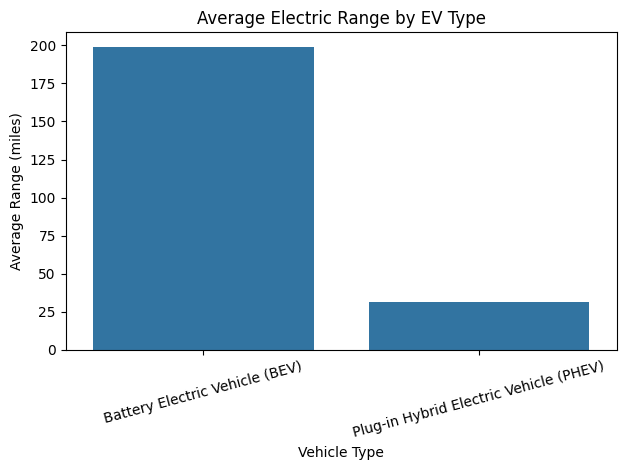

In [54]:

sns.barplot(data=range_type, x='Electric_Vehicle_Type', y='Avg_Range')

plt.title('Average Electric Range by EV Type')
plt.xlabel('Vehicle Type')
plt.ylabel('Average Range (miles)')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


In [55]:
# CAFV Eligibility Breakdown

In [57]:
cafv = pd.read_sql('''
    SELECT Clean_Alternative_Fuel_Vehicle_CAFV_Eligibility AS Eligibility, COUNT(*) AS Total
    FROM ev_data
    GROUP BY Eligibility
''', conn)
cafv = pd.read_sql(query,conn)
print(cafv)


                    Electric_Vehicle_Type   Avg_Range
0          Battery Electric Vehicle (BEV)  198.584372
1  Plug-in Hybrid Electric Vehicle (PHEV)   31.269719


In [61]:
query = '''
SELECT Clean_Alternative_Fuel_Vehicle_CAFV_Eligibility AS Eligibility,
       COUNT(*) AS Total
FROM ev_data
WHERE Clean_Alternative_Fuel_Vehicle_CAFV_Eligibility IS NOT NULL
GROUP BY Clean_Alternative_Fuel_Vehicle_CAFV_Eligibility
ORDER BY Total DESC
'''
cafv = pd.read_sql(query, conn)
print(cafv)


                               Eligibility  Total
0  Clean Alternative Fuel Vehicle Eligible  73281
1    Not eligible due to low battery range  22614


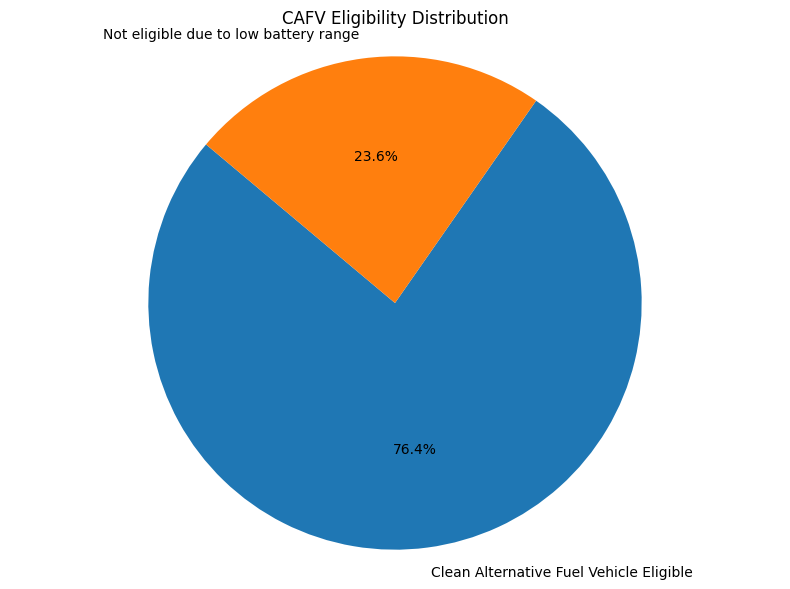

In [62]:

cafv = cafv.dropna(subset=['Eligibility', 'Total'])

# Plot
plt.figure(figsize=(8, 6))
plt.pie(cafv['Total'], labels=cafv['Eligibility'], autopct='%1.1f%%', startangle=140)
plt.title('CAFV Eligibility Distribution')
plt.axis('equal') 
plt.tight_layout()
plt.show()


In [63]:
# Trend by Model Year

In [69]:
query = '''
SELECT Model_Year, COUNT(*) AS Vehicle_Count
FROM ev_data
WHERE Model_Year IS NOT NULL
GROUP BY Model_Year
ORDER BY Model_Year
'''
yearly = pd.read_sql(query, conn)
print(yearly)


    Model_Year  Vehicle_Count
0         2000              7
1         2002              2
2         2003              1
3         2008             21
4         2010             23
5         2011            680
6         2012           1490
7         2013           4230
8         2014           3407
9         2015           4661
10        2016           5306
11        2017           8570
12        2018          14368
13        2019          10970
14        2020          12189
15        2021           4860
16        2022           4663
17        2023           7824
18        2024          10318
19        2025           2305


In [70]:
# Convert to int just in case
yearly['Model_Year'] = yearly['Model_Year'].astype(int)
yearly['Vehicle_Count'] = yearly['Vehicle_Count'].astype(int)


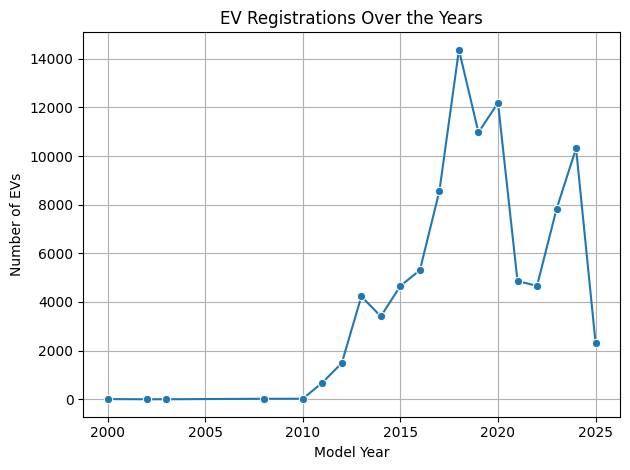

In [71]:
sns.lineplot(data=yearly, x='Model_Year', y='Vehicle_Count', marker='o')

plt.title('EV Registrations Over the Years')
plt.xlabel('Model Year')
plt.ylabel('Number of EVs')
plt.grid(True)
plt.tight_layout()
plt.show()


In [75]:
# Top Countries By EV Registration

In [79]:
query = '''
SELECT County, COUNT(*) AS EV_Count
FROM ev_data
WHERE County IS NOT NULL
GROUP BY County
ORDER BY EV_Count DESC
LIMIT 10
'''
county_data = pd.read_sql(query, conn)
print(county_data)



      County  EV_Count
0       King     45688
1  Snohomish     10029
2     Pierce      7738
3      Clark      6241
4   Thurston      3846
5     Kitsap      3615
6    Spokane      3055
7    Whatcom      2880
8     Benton      1502
9     Island      1233


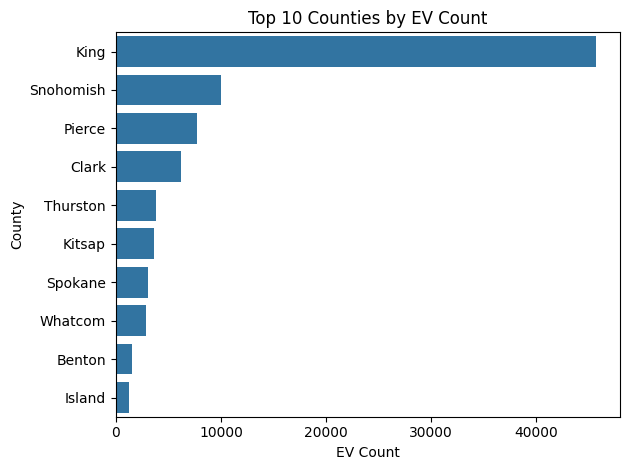

In [81]:
sns.barplot(data=county_data, x='EV_Count', y='County')
plt.title('Top 10 Counties by EV Count')
plt.xlabel('EV Count')
plt.ylabel('County')
plt.tight_layout()
plt.show()

In [82]:
# Average MSRP by Make

In [83]:
query = '''
SELECT Make, AVG(Base_MSRP) AS Avg_MSRP
FROM ev_data
WHERE Base_MSRP > 0
GROUP BY Make
ORDER BY Avg_MSRP DESC
LIMIT 10
'''
price_data = pd.read_sql(query, conn)
print(price_data)

                   Make       Avg_MSRP
0               PORSCHE  137253.125000
1                FISKER  102000.000000
2              CADILLAC   75095.000000
3                 TESLA   70225.385131
4                 VOLVO   56371.357616
5                   BMW   52833.604888
6              CHRYSLER   39995.000000
7                  MINI   36865.625000
8                SUBARU   34995.000000
9  WHEEGO ELECTRIC CARS   32995.000000


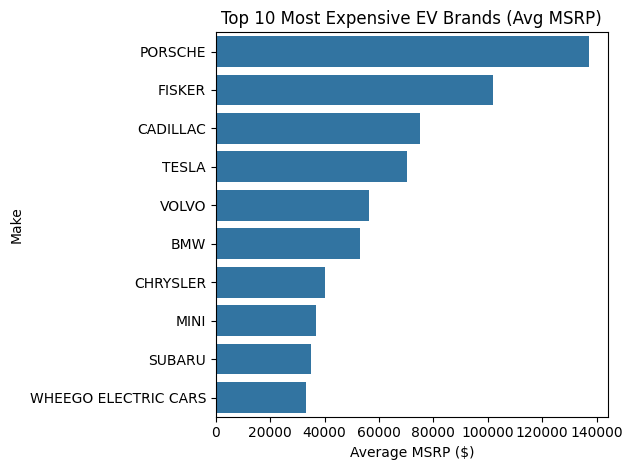

In [84]:
sns.barplot(data=price_data, x='Avg_MSRP', y='Make')
plt.title('Top 10 Most Expensive EV Brands (Avg MSRP)')
plt.xlabel('Average MSRP ($)')
plt.ylabel('Make')
plt.tight_layout()
plt.show()

In [85]:
#EV Adoption Over Time by Type (stacked trend plot)

In [89]:
query = '''
SELECT Model_Year, Electric_Vehicle_Type, COUNT(*) AS Count
FROM ev_data
WHERE Model_Year IS NOT NULL
GROUP BY Model_Year, Electric_Vehicle_Type
ORDER BY Model_Year
'''

ev_type_year = pd.read_sql(query, conn)
print(ev_type_year.head())


   Model_Year           Electric_Vehicle_Type  Count
0        2000  Battery Electric Vehicle (BEV)      7
1        2002  Battery Electric Vehicle (BEV)      2
2        2003  Battery Electric Vehicle (BEV)      1
3        2008  Battery Electric Vehicle (BEV)     21
4        2010  Battery Electric Vehicle (BEV)     21


In [90]:
pivoted = ev_type_year.pivot(index='Model_Year', columns='Electric_Vehicle_Type', values='Count').fillna(0)
print(pivoted)


Electric_Vehicle_Type  Battery Electric Vehicle (BEV)  \
Model_Year                                              
2000                                              7.0   
2002                                              2.0   
2003                                              1.0   
2008                                             21.0   
2010                                             21.0   
2011                                            611.0   
2012                                            680.0   
2013                                           2689.0   
2014                                           1656.0   
2015                                           3386.0   
2016                                           3607.0   
2017                                           4653.0   
2018                                          10005.0   
2019                                           8916.0   
2020                                          10345.0   
2021                           

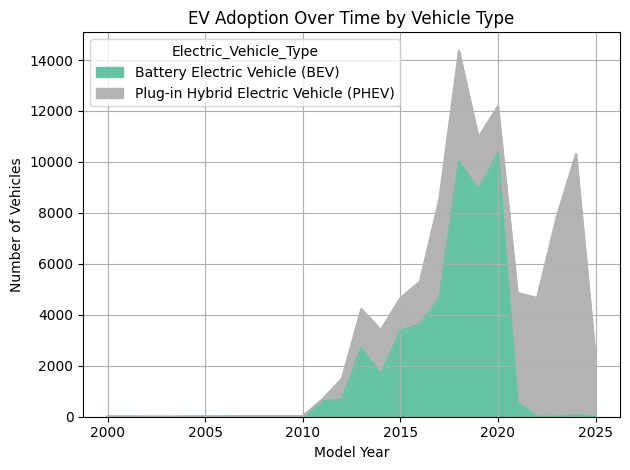

In [92]:
pivoted.plot(kind='area', stacked=True, colormap='Set2')
plt.title('EV Adoption Over Time by Vehicle Type')
plt.xlabel('Model Year')
plt.ylabel('Number of Vehicles')
plt.grid(True)
plt.tight_layout()
plt.show()


In [93]:
# City Wise EV Distribution

In [96]:
query = '''
SELECT City, COUNT(*) AS EV_Count
FROM ev_data
WHERE City IS NOT NULL
GROUP BY City
ORDER BY EV_Count DESC
LIMIT 10
'''

city_counts = pd.read_sql(query, conn)
print(city_counts)


        City  EV_Count
0    Seattle     15807
1  Vancouver      3843
2   Bellevue      3816
3     Renton      2786
4    Redmond      2645
5    Olympia      2569
6   Kirkland      2497
7    Bothell      2248
8     Tacoma      2234
9  Sammamish      2092


/var/folders/47/52n8nvf136x7f4rtd97135vh0000gn/T/ipykernel_14937/375051087.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=city_counts, y='City', x='EV_Count', palette='viridis')


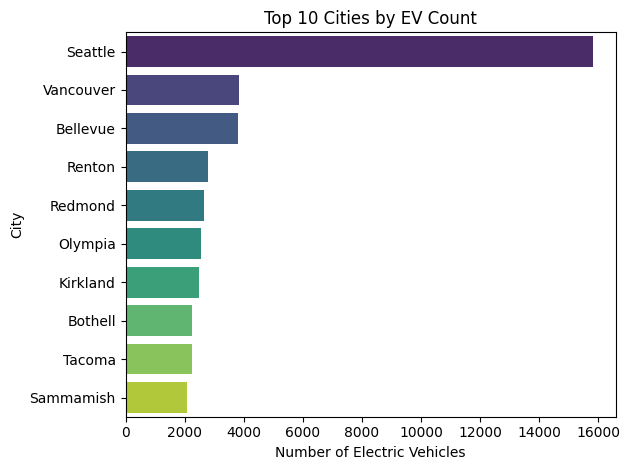

In [ ]:
sns.barplot(data=city_counts, y='City', x='EV_Count', palette='viridis')
plt.title('Top 10 Cities by EV Count')
plt.xlabel('Number of Electric Vehicles')
plt.ylabel('City')
plt.tight_layout()
plt.show()


In [98]:
#EV Density by Zip Code (Top 10 Postal Codes)

In [99]:
query_7 = '''
SELECT Postal_Code, COUNT(*) AS EV_Count
FROM ev_data
WHERE Postal_Code IS NOT NULL 
GROUP BY Postal_Code
ORDER BY EV_Count DESC
LIMIT 10
'''
zip_counts = pd.read_sql(query_7, conn)
print(zip_counts)

   Postal_Code  EV_Count
0      98188.0      2155
1      98052.0      1790
2      98115.0      1487
3      98033.0      1416
4      98006.0      1232
5      98103.0      1227
6      98072.0      1216
7      98012.0      1211
8      98040.0      1177
9      98004.0      1115


/var/folders/47/52n8nvf136x7f4rtd97135vh0000gn/T/ipykernel_14937/3426873079.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=zip_counts, x='EV_Count', y='Postal_Code', palette='plasma')


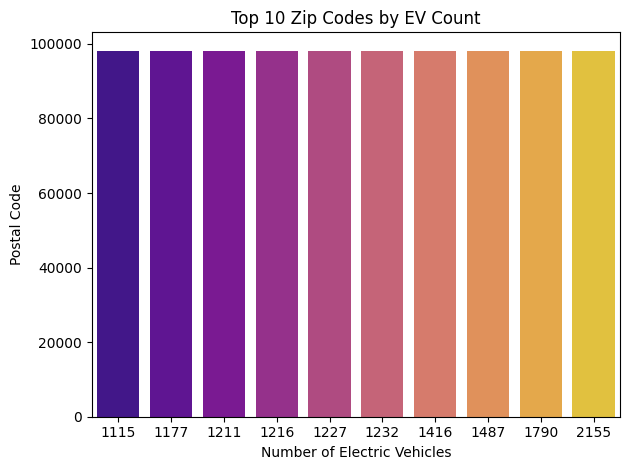

In [100]:

sns.barplot(data=zip_counts, x='EV_Count', y='Postal_Code', palette='plasma')
plt.title('Top 10 Zip Codes by EV Count')
plt.xlabel('Number of Electric Vehicles')
plt.ylabel('Postal Code')
plt.tight_layout()
plt.show()


In [102]:
#Electric Range Distribution (Histogram)

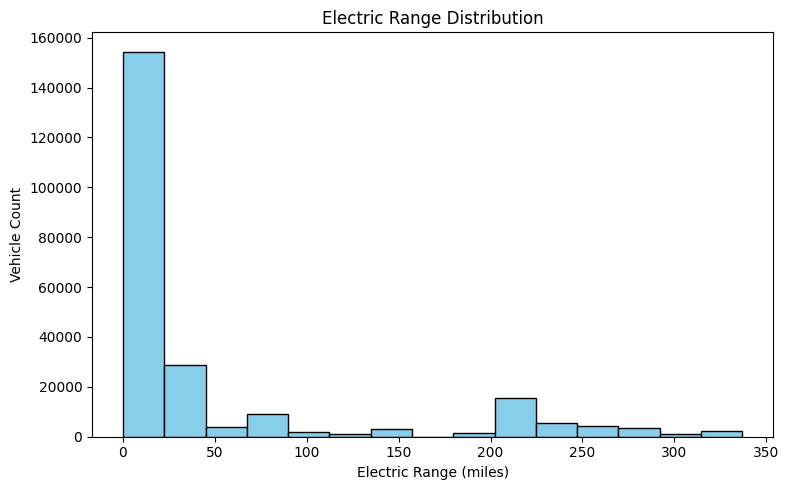

In [103]:
plt.figure(figsize=(8, 5))
df['Electric_Range'].dropna().plot(kind='hist', bins=15, color='skyblue', edgecolor='black')
plt.title('Electric Range Distribution')
plt.xlabel('Electric Range (miles)')
plt.ylabel('Vehicle Count')
plt.tight_layout()
plt.show()


In [104]:
#Range vs MSRP Scatter Plot (Correlation)

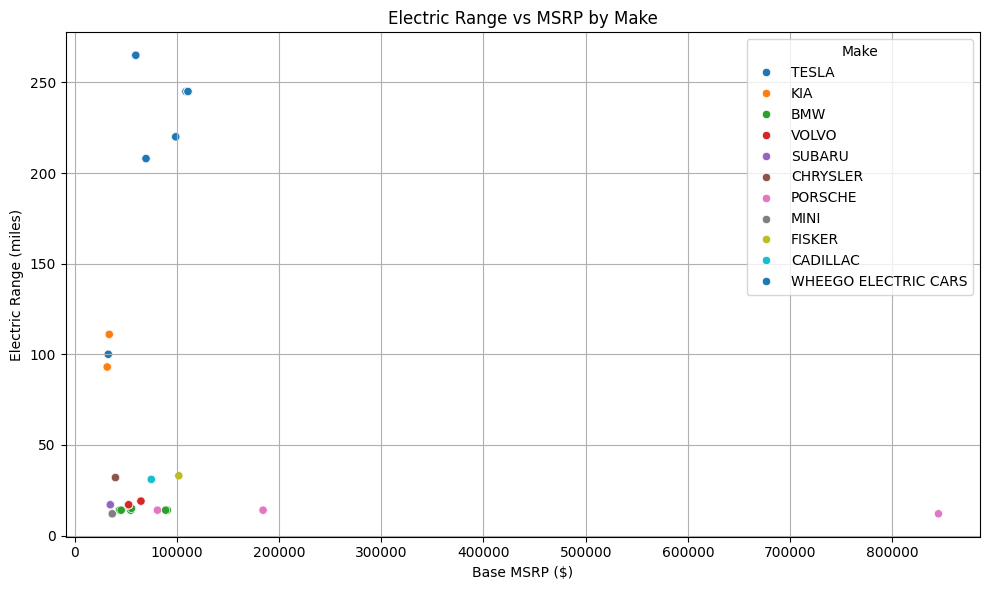

In [105]:
df_filtered = df[(df['Electric_Range'] > 0) & (df['Base_MSRP'] > 0)]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_filtered, x='Base_MSRP', y='Electric_Range', hue='Make', palette='tab10')
plt.title('Electric Range vs MSRP by Make')
plt.xlabel('Base MSRP ($)')
plt.ylabel('Electric Range (miles)')
plt.grid(True)
plt.tight_layout()
plt.show()


In [106]:
#CAFV Eligibility Rate by Model Year

In [122]:
query = '''
SELECT Model_Year,
       SUM(CASE WHEN Clean_Alternative_Fuel_Vehicle_CAFV_Eligibility LIKE '%Eligible%' THEN 1 ELSE 0 END) * 1.0 / COUNT(*) AS Eligibility_Rate
FROM ev_data
WHERE Model_Year IS NOT NULL
GROUP BY Model_Year
ORDER BY Model_Year
'''
cafv_year = pd.read_sql(query, conn)
print(cafv_year)

    Model_Year  Eligibility_Rate
0         2000               1.0
1         2002               1.0
2         2003               1.0
3         2008               1.0
4         2010               1.0
5         2011               1.0
6         2012               1.0
7         2013               1.0
8         2014               1.0
9         2015               1.0
10        2016               1.0
11        2017               1.0
12        2018               1.0
13        2019               1.0
14        2020               1.0
15        2021               1.0
16        2022               1.0
17        2023               1.0
18        2024               1.0
19        2025               1.0


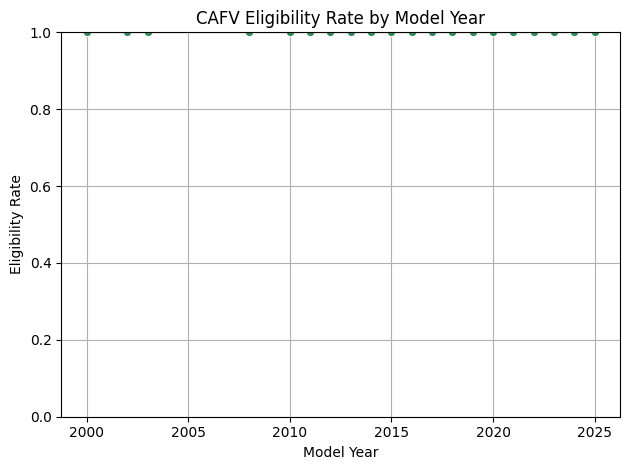

In [109]:
sns.lineplot(data=cafv_year, x='Model_Year', y='Eligibility_Rate', marker='o', color='seagreen')
plt.title('CAFV Eligibility Rate by Model Year')
plt.xlabel('Model Year')
plt.ylabel('Eligibility Rate')
plt.ylim(0, 1)
plt.grid(True)
plt.tight_layout()
plt.show()


In [110]:
#MSRP Distribution (Box Plot)

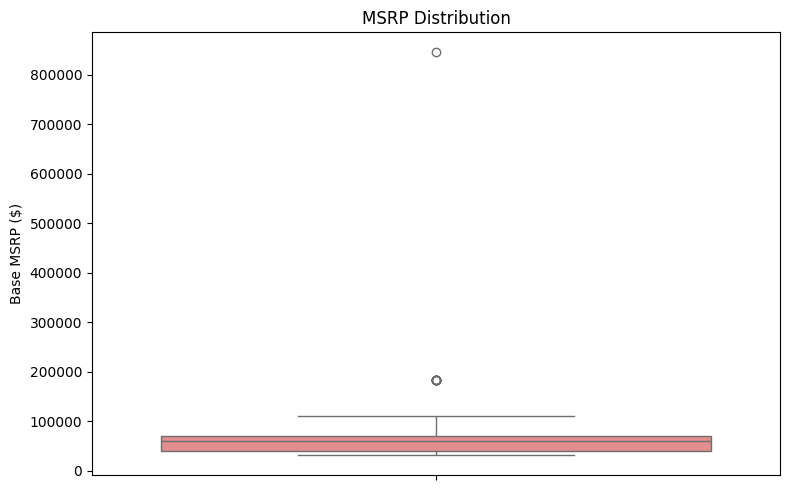

In [111]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df[df['Base_MSRP'] > 0], y='Base_MSRP', color='lightcoral')
plt.title('MSRP Distribution')
plt.ylabel('Base MSRP ($)')
plt.tight_layout()
plt.show()


In [112]:
#Models with Best Range-to-Price Ratio

In [113]:
df_ratio = df[(df['Base_MSRP'] > 0) & (df['Electric_Range'] > 0)].copy()
df_ratio['Value_Ratio'] = df_ratio['Electric_Range'] / df_ratio['Base_MSRP']
best_value = df_ratio.sort_values('Value_Ratio', ascending=False)[['Make', 'Model', 'Electric_Range', 'Base_MSRP', 'Value_Ratio']].head(10)
print(best_value)


         Make    Model  Electric_Range  Base_MSRP  Value_Ratio
234884  TESLA  MODEL S           265.0    59900.0     0.004424
536     TESLA  MODEL S           265.0    59900.0     0.004424
13890   TESLA  MODEL S           265.0    59900.0     0.004424
5       TESLA  MODEL S           265.0    59900.0     0.004424
213646  TESLA  MODEL S           265.0    59900.0     0.004424
234107  TESLA  MODEL S           265.0    59900.0     0.004424
214375  TESLA  MODEL S           265.0    59900.0     0.004424
117263  TESLA  MODEL S           265.0    59900.0     0.004424
233613  TESLA  MODEL S           265.0    59900.0     0.004424
233547  TESLA  MODEL S           265.0    59900.0     0.004424


In [115]:
#Legislative Districts with Most EVs

In [121]:
query = '''
SELECT Legislative_District, COUNT(*) AS EV_Count
FROM ev_data
WHERE Legislative_District IS NOT NULL
GROUP BY Legislative_District
ORDER BY EV_Count DESC
LIMIT 10
'''
districts = pd.read_sql(query, conn)
print(districts)

   Legislative_District  EV_Count
0                  41.0      5050
1                  45.0      4771
2                  11.0      4570
3                  48.0      4123
4                  36.0      3804
5                  46.0      3763
6                  43.0      3485
7                   1.0      3358
8                   5.0      3292
9                  34.0      3070


/var/folders/47/52n8nvf136x7f4rtd97135vh0000gn/T/ipykernel_14937/2469511708.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=districts, x='EV_Count', y='Legislative_District', palette='rocket')


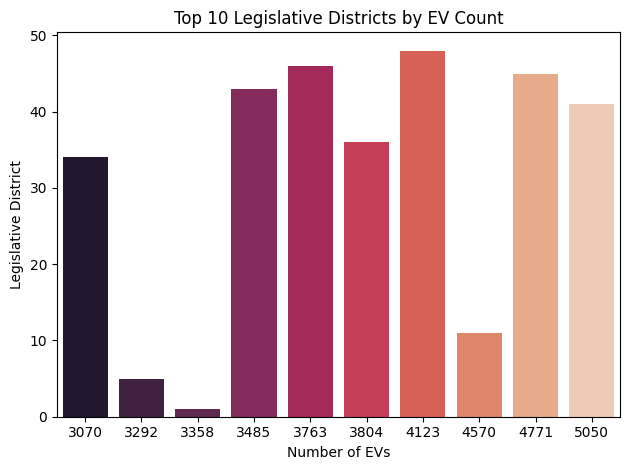

In [118]:
sns.barplot(data=districts, x='EV_Count', y='Legislative_District', palette='rocket')
plt.title('Top 10 Legislative Districts by EV Count')
plt.xlabel('Number of EVs')
plt.ylabel('Legislative District')
plt.tight_layout()
plt.show()


In [119]:
#New Brands in the Latest Years

In [120]:
query = '''
SELECT DISTINCT Make, Model_Year
FROM ev_data
WHERE Model_Year >= 2022
ORDER BY Model_Year DESC, Make
'''
new_brands = pd.read_sql(query, conn)
print(new_brands)


          Make  Model_Year
0   ALFA ROMEO        2025
1         AUDI        2025
2      BENTLEY        2025
3          BMW        2025
4     CHRYSLER        2025
..         ...         ...
63        MINI        2022
64  MITSUBISHI        2022
65     PORSCHE        2022
66      TOYOTA        2022
67       VOLVO        2022

[68 rows x 2 columns]
